In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma

Построения сеток

Стандартная для пластины с отверстием

In [2]:
def void_mesh0(d1,d2,p,m,R,element_type):
    q = np.array([[0,0],[d1,0],[0,d2],[d1,d2]])
    PD = 2
    NoN = (m+1)*(p+1)*2+(m+1)*(p-1)*2
    NoE = 4*p*m
    NPE = 4
    NL = np.zeros([NoN,PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/p
    
    coor11 = np.zeros([(p+1)*(m+1),PD])
    
    for i in range(1,p+2):
        coor11[i-1,0] = q[0,0]+(i-1)*a
        coor11[i-1,1] = q[0,1]
    for i in range(1,p+2):
        coor11[m*(p+1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
        coor11[m*(p+1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor11[m*(p+1)+j-1,0]-coor11[j-1,0])/m
            dy = (coor11[m*(p+1)+j-1,1]-coor11[j-1,1])/m
            coor11[i*(p+1)+j-1,0] = coor11[(i-1)*(p+1)+j-1,0] + dx
            coor11[i*(p+1)+j-1,1] = coor11[(i-1)*(p+1)+j-1,1] + dy
    
    coor22 =np.zeros([(p+1)*(m+1),PD])
    for i in range(1,p+2):
        coor22[i-1,0] = q[2,0]+(i-1)*a
        coor22[i-1,1] = q[2,1]
    for i in range(1,p+2):
        coor22[m*(p+1)+i-1,0] = d1/2 + R*np.cos((3*ma.pi/4)-(i-1)*ma.pi/(p*2))
        coor22[m*(p+1)+i-1,1] = d2/2 + R*np.sin((3*ma.pi/4)-(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor22[m*(p+1)+j-1,0]-coor22[j-1,0])/m
            dy = (coor22[m*(p+1)+j-1,1]-coor22[j-1,1])/m
            coor22[i*(p+1)+j-1,0] = coor22[(i-1)*(p+1)+j-1,0] + dx
            coor22[i*(p+1)+j-1,1] = coor22[(i-1)*(p+1)+j-1,1] + dy
            
    coor33 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor33[i-1,0] = q[0,0]
        coor33[i-1,1] = q[0,1] + i*b
    for i in range(1,p):
        coor33[m*(p-1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)-(i)*ma.pi/(p*2))
        coor33[m*(p-1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)-(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor33[m*(p-1)+j-1,0]-coor33[j-1,0])/m
            dy = (coor33[m*(p-1)+j-1,1]-coor33[j-1,1])/m
            coor33[i*(p-1)+j-1,0] = coor33[(i-1)*(p-1)+j-1,0] + dx
            coor33[i*(p-1)+j-1,1] = coor33[(i-1)*(p-1)+j-1,1] + dy
     
    coor44 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor44[i-1,0] = q[1,0]
        coor44[i-1,1] = q[1,1] + i*b
    for i in range(1,p):
        coor44[m*(p-1)+i-1,0] = d1/2 + R*np.cos((7*ma.pi/4)+(i)*ma.pi/(p*2))
        coor44[m*(p-1)+i-1,1] = d2/2 + R*np.sin((7*ma.pi/4)+(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor44[m*(p-1)+j-1,0]-coor44[j-1,0])/m
            dy = (coor44[m*(p-1)+j-1,1]-coor44[j-1,1])/m
            coor44[i*(p-1)+j-1,0] = coor44[(i-1)*(p-1)+j-1,0] + dx
            coor44[i*(p-1)+j-1,1] = coor44[(i-1)*(p-1)+j-1,1] + dy
     
    for i in range(1,m+2):
        NL[(i-1)*4*p:i*4*p,:] = np.vstack([coor11[(i-1)*(p+1):i*(p+1),:],coor44[(i-1)*(p-1):i*(p-1),:],np.flipud(coor22[(i-1)*(p+1):i*(p+1),:]),np.flipud(coor33[(i-1)*(p-1):i*(p-1),:])])
    

    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,4*p+1):
            if j == 1:
                EL[(i-1)*4*p+j-1,0] = (i-1)*4*p + j 
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
            elif j == 4*p:
                EL[(i-1)*4*p+j-1,0] = i*4*p
                EL[(i-1)*4*p+j-1,1] = (i-1)*4*p + 1
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p 
            else:
                EL[(i-1)*4*p+j-1,0] = EL[(i-1)*4*p+j-2,1]
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-2,2]
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
    if element_type == 'D2TR3N':
        NPEn = 3
        NoEn = 2*NoE
        ELn = np.zeros([NoEn,NPE])
        for i in range(1,NoE+1):
            ELn[2*(i-1),0] = EL[i-1,0] 
            ELn[2*(i-1),1] = EL[i-1,1] 
            ELn[2*(i-1),2] = EL[i-1,2] 
            ELn[2*(i-1)+1,0] = EL[i-1,0] 
            ELn[2*(i-1)+1,1] = EL[i-1,2] 
            ELn[2*(i-1)+1,2] = EL[i-1,3] 
        EL = ELn 
    EL = EL.astype(int)
    return NL,EL

Для стандартной локальной области

In [3]:
def void_mesh1(Nout,Nin,m):
    PD = 2
    part_count = len(Nin)
    NoE = part_count*m
    NPE = 3
    NL = np.zeros([part_count*(m+1),PD])
    for i in range(part_count):
        aout = (Nout[i,0]-Nin[i,0])/m
        bout = (Nout[i,1]-Nin[i,1])/m
        for j in range(m+1):
            NL[i+j*part_count,0] = Nin[i,0] + j*aout
            NL[i+j*part_count,1] = Nin[i,1] + j*bout
    EL = np.zeros([NoE*2,NPE])
    for i in range(NoE):
        if (i+1)%part_count == 0:
            EL[i*2,0] = i+1
            EL[i*2,1] = i+1-part_count+1
            EL[i*2,2] = i+1+1     
            EL[i*2+1,0] = i+1
            EL[i*2+1,1] = i+1+1
            EL[i*2+1,2] = i+part_count+1  
        else: 
            EL[i*2,0] = i+1
            EL[i*2,1] = i+1+1
            EL[i*2,2] = i+1+part_count+1      
            EL[i*2+1,0] = i+1
            EL[i*2+1,1] = i+1+part_count+1
            EL[i*2+1,2] = i+part_count +1
    EL = EL.astype(int)
    
    return NL,EL

[[ 1  2  6]
 [ 1  6  5]
 [ 2  3  7]
 [ 2  7  6]
 [ 3  4  8]
 [ 3  8  7]
 [ 4  1  5]
 [ 4  5  8]
 [ 5  6 10]
 [ 5 10  9]
 [ 6  7 11]
 [ 6 11 10]
 [ 7  8 12]
 [ 7 12 11]
 [ 8  5  9]
 [ 8  9 12]] [[0.  0. ]
 [1.  0. ]
 [1.  1. ]
 [0.  1. ]
 [0.2 0.2]
 [0.8 0.2]
 [0.8 0.8]
 [0.2 0.8]
 [0.4 0.4]
 [0.6 0.4]
 [0.6 0.6]
 [0.4 0.6]]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

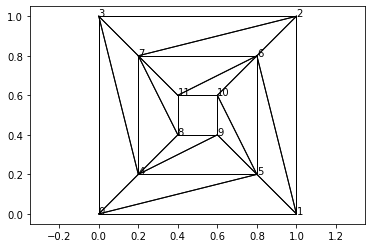

In [4]:
e =  np.array([[0,0],[1,0],[1,1],[0,1]])
e1 =  np.array([[0.4,0.4],[0.6,0.4],[0.6,0.6],[0.4,0.6]])
NL, EL = void_mesh1(e1,e,2)
print(EL,NL)
for i in range(len(NL)):
    plt.annotate(i,xy = (NL[i,0],NL[i,1]))
plt.axis('equal')
x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
plt.plot(np.array([x0,x1]),np.array([y0,y1]),'black',linewidth=1)
plt.plot(np.array([x1,x2]),np.array([y1,y2]),'black',linewidth=1)
plt.plot(np.array([x2,x0]),np.array([y2,y0]),'black',linewidth=1)
plt.plot

Для прямоугольника без отверстия

In [5]:
def uniform_function(d1,d2,p,m):
    
    PD = 2
    q = np.array([[0,0],[d1,0],[0,d2],[d1,d2]])
    NoN = (p+1)*(m+1)
    NoE = p*m
    NPE = 4
    NL = np.zeros([NoN, PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/m
    n = 0
    for i in range(1,m+2):
        for j in range(1,p+2):
            NL[n,0] = q[0,0]+(j-1)*a
            NL[n,1] = q[0,1]+(i-1)*b
            n+=1
    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,p+1):
            if j == 1:
                
                EL[(i-1)*p+j-1,0] = ((i-1)*(p+1) + j)
                EL[(i-1)*p+j-1,1] = (EL[(i-1)*p+j-1,0] + 1)
                EL[(i-1)*p+j-1,3] = (EL[(i-1)*p+j-1,0] + (p+1))
                EL[(i-1)*p+j-1,2] = (EL[(i-1)*p+j-1,3] +1)
            else:
                EL[(i-1)*p+j-1,0] = (EL[(i-1)*p+j-2,1])
                EL[(i-1)*p+j-1,3] = (EL[(i-1)*p+j-2,2])
                EL[(i-1)*p+j-1,1] = (EL[(i-1)*p+j-1,0] + 1)
                EL[(i-1)*p+j-1,2] = (EL[(i-1)*p+j-1,3] + 1)
    
    NPEn = 3
    NoEn = NoE*2
    ELn = np.zeros([NoEn,NPEn])
    for i in range(1,NoE+1):
        ELn[2*(i-1),0] = EL[i-1,0]
        ELn[2*(i-1),1] = EL[i-1,1]
        ELn[2*(i-1),2] = EL[i-1,2]
            
        ELn[2*(i-1)+1,0] = EL[i-1,0]
        ELn[2*(i-1)+1,1] = EL[i-1,2]
        ELn[2*(i-1)+1,2] = EL[i-1,3]
    EL = ELn
        
    EL = EL.astype(int)
    NPEn = 3
    count2 = 1
    for j in range(0,NoE*2):
        plt.annotate(count2,xy = ((NL[EL[j,0]-1,0]+NL[EL[j,1]-1,0]+NL[EL[j,2]-1,0])/3,(NL[EL[j,0]-1,1]+NL[EL[j,1]-1,1]+NL[EL[j,2]-1,1])/3),c = 'blue')
        count2 += 1
    return NL, EL

[[ 1  2  6]
 [ 1  6  5]
 [ 2  3  7]
 [ 2  7  6]
 [ 3  4  8]
 [ 3  8  7]
 [ 5  6 10]
 [ 5 10  9]
 [ 6  7 11]
 [ 6 11 10]
 [ 7  8 12]
 [ 7 12 11]]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

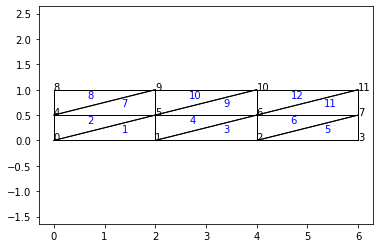

In [6]:
NL, EL = uniform_function(6,1,3,2)
print(EL)
plt.axis('equal')
x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
for i in range(len(NL)):
    plt.annotate(i,xy = (NL[i,0],NL[i,1]))
plt.plot(np.array([x0,x1]),np.array([y0,y1]),'black',linewidth=1)
plt.plot(np.array([x1,x2]),np.array([y1,y2]),'black',linewidth=1)
plt.plot(np.array([x2,x0]),np.array([y2,y0]),'black',linewidth=1)
plt.plot

Для прямоугольной пластины с эллипсоидальным отверстием

In [ ]:
def void_mesh2(d1,d2,p,m,aa,bb,element_type):
    q = np.array([[0,0],[d1,0],[0,d2],[d1,d2]])
    PD = 2
    NoN = (m+1)*(p+1)*2+(m+1)*(p-1)*2
    NoE = 4*p*m
    NPE = 4
    NL = np.zeros([NoN,PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/p
    
    coor11 = np.zeros([(p+1)*(m+1),PD])
    
    for i in range(1,p+2):
        coor11[i-1,0] = q[0,0]+(i-1)*a
        coor11[i-1,1] = q[0,1]
    for i in range(1,p+2):
        coor11[m*(p+1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
        coor11[m*(p+1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor11[m*(p+1)+j-1,0]-coor11[j-1,0])/m
            dy = (coor11[m*(p+1)+j-1,1]-coor11[j-1,1])/m
            coor11[i*(p+1)+j-1,0] = coor11[(i-1)*(p+1)+j-1,0] + dx
            coor11[i*(p+1)+j-1,1] = coor11[(i-1)*(p+1)+j-1,1] + dy
    
    coor22 =np.zeros([(p+1)*(m+1),PD])
    for i in range(1,p+2):
        coor22[i-1,0] = q[2,0]+(i-1)*a
        coor22[i-1,1] = q[2,1]
    for i in range(1,p+2):
        coor22[m*(p+1)+i-1,0] = d1/2 + R*np.cos((3*ma.pi/4)-(i-1)*ma.pi/(p*2))
        coor22[m*(p+1)+i-1,1] = d2/2 + R*np.sin((3*ma.pi/4)-(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor22[m*(p+1)+j-1,0]-coor22[j-1,0])/m
            dy = (coor22[m*(p+1)+j-1,1]-coor22[j-1,1])/m
            coor22[i*(p+1)+j-1,0] = coor22[(i-1)*(p+1)+j-1,0] + dx
            coor22[i*(p+1)+j-1,1] = coor22[(i-1)*(p+1)+j-1,1] + dy
            
    coor33 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor33[i-1,0] = q[0,0]
        coor33[i-1,1] = q[0,1] + i*b
    for i in range(1,p):
        coor33[m*(p-1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)-(i)*ma.pi/(p*2))
        coor33[m*(p-1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)-(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor33[m*(p-1)+j-1,0]-coor33[j-1,0])/m
            dy = (coor33[m*(p-1)+j-1,1]-coor33[j-1,1])/m
            coor33[i*(p-1)+j-1,0] = coor33[(i-1)*(p-1)+j-1,0] + dx
            coor33[i*(p-1)+j-1,1] = coor33[(i-1)*(p-1)+j-1,1] + dy
     
    coor44 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor44[i-1,0] = q[1,0]
        coor44[i-1,1] = q[1,1] + i*b
    for i in range(1,p):
        coor44[m*(p-1)+i-1,0] = d1/2 + R*np.cos((7*ma.pi/4)+(i)*ma.pi/(p*2))
        coor44[m*(p-1)+i-1,1] = d2/2 + R*np.sin((7*ma.pi/4)+(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor44[m*(p-1)+j-1,0]-coor44[j-1,0])/m
            dy = (coor44[m*(p-1)+j-1,1]-coor44[j-1,1])/m
            coor44[i*(p-1)+j-1,0] = coor44[(i-1)*(p-1)+j-1,0] + dx
            coor44[i*(p-1)+j-1,1] = coor44[(i-1)*(p-1)+j-1,1] + dy
     
    for i in range(1,m+2):
        NL[(i-1)*4*p:i*4*p,:] = np.vstack([coor11[(i-1)*(p+1):i*(p+1),:],coor44[(i-1)*(p-1):i*(p-1),:],np.flipud(coor22[(i-1)*(p+1):i*(p+1),:]),np.flipud(coor33[(i-1)*(p-1):i*(p-1),:])])
    

    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,4*p+1):
            if j == 1:
                EL[(i-1)*4*p+j-1,0] = (i-1)*4*p + j 
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
            elif j == 4*p:
                EL[(i-1)*4*p+j-1,0] = i*4*p
                EL[(i-1)*4*p+j-1,1] = (i-1)*4*p + 1
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p 
            else:
                EL[(i-1)*4*p+j-1,0] = EL[(i-1)*4*p+j-2,1]
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-2,2]
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
    if element_type == 'D2TR3N':
        NPEn = 3
        NoEn = 2*NoE
        ELn = np.zeros([NoEn,NPE])
        for i in range(1,NoE+1):
            ELn[2*(i-1),0] = EL[i-1,0] 
            ELn[2*(i-1),1] = EL[i-1,1] 
            ELn[2*(i-1),2] = EL[i-1,2] 
            ELn[2*(i-1)+1,0] = EL[i-1,0] 
            ELn[2*(i-1)+1,1] = EL[i-1,2] 
            ELn[2*(i-1)+1,2] = EL[i-1,3] 
        EL = ELn 
    EL = EL.astype(int)
    return NL,EL

In [ ]:
NL, EL = void_mesh(4,4,5,5,3,1,'D2TR3N')

x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
plt.axis('equal')


plt.plot(np.array([x0,x1]),np.array([y0,y1]),'black',linewidth=0.5);
plt.plot(np.array([x1,x2]),np.array([y1,y2]),'black',linewidth=0.5);
plt.plot(np.array([x2,x0]),np.array([y2,y0]),'black',linewidth=0.5);


Тест